<a href="https://colab.research.google.com/github/Viraj1901181/CF969-Big-Data-for-Computational-Finance/blob/master/NLP_for_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
start = time.time()
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

#plotting
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

#statistics & econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm

#model fiiting and selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1. Load the data

In [3]:
df = pd.read_csv("/content/Combined_News_DJIA.csv",low_memory=False,
                    parse_dates=[0])

full_stock = pd.read_csv("/content/DJIA_table.csv",low_memory=False,
                    parse_dates=[0])

#add the closing stock value to the df - this will be the y variable
df["Close"]=full_stock.Close

#show how the dataset looks like
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",17949.369141
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",17929.990234
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",17694.679688
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to att

In [0]:
#drop the label column
df = df.drop(["Label"], axis=1)

# 2. Data cleaning

NA treatment
We'll simply fill the NAs in the numerical features (Date, Close). In the text features we'll fill the missing values with ''.

In [0]:
NA treatment
We'll simply fill the NAs in the numerical features (Date, Close). In the text features we'll fill the missing values with ''.

In [5]:
#check for NAN
df.isnull().sum()

Date     0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
Close    0
dtype: int64

In [6]:
df = df.replace(np.nan, ' ', regex=True)

#sanity check
df.isnull().sum().sum()

0

Remove the HTML tags
There are several non-word tags in the headlines that would just bias the sentiment analysis so we need to remove them and replace with ''. This can be done with regex.

In [7]:
df = df.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
df.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Close
0,2008-08-08,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,Did the U.S. Prep Georgia for War with Russia?',Rice Gives Green Light for Israel to Attack Ir...,Announcing:Class Action Lawsuit on Behalf of A...,So---Russia and Georgia are at war and the NYT...,China tells Bush to stay out of other countrie...,Did World War III start today?',Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash',Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,17949.369141
1,2008-08-11,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,Welcome To World War IV! Now In High Definition!',"Georgia's move, a mistake of monumental propor...",Russia presses deeper into Georgia; U.S. says ...,Abhinav Bindra wins first ever Individual Olym...,U.S. ship heads for Arctic to define territory',Drivers in a Jerusalem taxi station threaten t...,The French Team is Stunned by Phelps and the 4...,Israel and the US behind the Georgian aggressi...,"Do not believe TV, neither Russian nor Georgia...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer',War in South Ossetia [PICS]',Israeli Physicians Group Condemns State Torture',Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war',So this is what it's come to: trading sex for ...,17929.990234


# Sentiment and subjectivity score extraction
Now I run the sentiment analysis extracting the compound score that goes from -0.5 (most negative) to 0.5 (most positive). I'm going to use the "dirty" texts in this part because VADER can utilize the information such as ALL CAPS, punctuation, etc. I'll also calculate the subjectivity of each headline using the TextBlob package.

Initialise the VADER analyzer.

In [10]:
!pip install tweepy
!pip install textblob
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
Anakin = SentimentIntensityAnalyzer()

Anakin.polarity_scores(" ")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

Write a function to save the subjectivity score directly from TextBlob function's output. Subjectivity score might detect direct quotes in the headlines and positive stuff is rarely quoted in the headline.








In [11]:
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

detect_subjectivity(" ") #should return 0

0.0

In [0]:
#get the headline columns' names
cols = []
for i in range(1,26):
    col = ("Top{}".format(i))
    cols.append(col)

In [14]:
start_vect=time.time()
print("ANAKIN: 'Intializing the process..'")

#get the name of the headline columns
cols = []
for i in range(1,26):
    col = ("Top{}".format(i))
    cols.append(col)


for col in cols:
    df[col] = df[col].astype(str) # Make sure data is treated as a string
    df[col+'_comp']= df[col].apply(lambda x:Anakin.polarity_scores(x)['compound'])
    df[col+'_sub'] = df[col].apply(detect_subjectivity)
    print("{} Done".format(col))
    
print("VADER: Vaderization completed after %0.2f Minutes"%((time.time() - start_vect)/60))

ANAKIN: 'Intializing the process..'
Top1 Done
Top2 Done
Top3 Done
Top4 Done
Top5 Done
Top6 Done
Top7 Done
Top8 Done
Top9 Done
Top10 Done
Top11 Done
Top12 Done
Top13 Done
Top14 Done
Top15 Done
Top16 Done
Top17 Done
Top18 Done
Top19 Done
Top20 Done
Top21 Done
Top22 Done
Top23 Done
Top24 Done
Top25 Done
VADER: Vaderization completed after 0.61 Minutes


In [15]:
#the text isn't required anymore
df = df.drop(cols,axis=1)
df.head(5)

,Date,Close,Top1_comp,Top1_sub,Top2_comp,Top2_sub,Top3_comp,Top3_sub,Top4_comp,Top4_sub,Top5_comp,Top5_sub,Top6_comp,Top6_sub,Top7_comp,Top7_sub,Top8_comp,Top8_sub,Top9_comp,Top9_sub,Top10_comp,Top10_sub,Top11_comp,Top11_sub,Top12_comp,Top12_sub,Top13_comp,Top13_sub,Top14_comp,Top14_sub,Top15_comp,Top15_sub,Top16_comp,Top16_sub,Top17_comp,Top17_sub,Top18_comp,Top18_sub,Top19_comp,Top19_sub,Top20_comp,Top20_sub,Top21_comp,Top21_sub,Top22_comp,Top22_sub,Top23_comp,Top23_sub,Top24_comp,Top24_sub,Top25_comp,Top25_sub
0,2008-08-08,17949.369141,-0.5994,0.0,0.0000,0.000000,-0.3612,0.000000,-0.7089,0.200000,-0.9260,0.528571,0.0000,0.096296,-0.2732,0.000,0.2144,0.300000,-0.5719,0.000,-0.5994,0.0,-0.6486,0.366667,-0.2263,0.055556,-0.7645,0.6,0.0000,0.375000,-0.5994,0.000000,0.0000,0.550000,0.0000,0.000000,0.2086,0.100000,0.2023,0.251515,0.0258,0.00,-0.7579,0.666667,-0.6249,0.0,-0.2755,0.00,-0.8519,0.200000,0.1280,0.0
1,2008-08-11,17929.990234,0.8156,0.0,-0.3182,0.288889,0.4404,0.100000,-0.1965,0.000000,0.0000,0.000000,-0.4939,0.454545,-0.5106,0.475,-0.0772,0.350000,-0.3578,0.720,-0.3400,0.0,0.0000,0.000000,0.7783,0.311111,0.0000,0.0,-0.3818,0.454545,-0.1027,0.000000,0.0000,0.700000,-0.3804,0.250000,-0.8271,0.000000,0.0000,0.000000,-0.5994,0.00,-0.8020,0.000000,0.0000,0.0,-0.3182,0.00,-0.1832,0.500000,0.0000,0.0
2,2008-08-12,17694.679688,0.0258,1.0,0.0000,0.000000,-0.7845,0.833333,-0.6124,1.000000,0.0000,0.000000,-0.6908,0.000000,-0.5994,0.000,-0.5994,0.344444,0.3400,0.275,-0.7650,0.0,-0.7964,0.176190,-0.4404,0.200000,-0.8591,0.0,0.0000,0.428571,0.5423,0.500000,0.0000,0.333333,0.0000,0.535714,0.0772,0.666667,-0.5994,1.000000,-0.5859,1.00,-0.5994,0.000000,0.5267,0.0,0.3818,0.35,0.0000,0.454545,0.0000,0.0
3,2008-08-13,17409.720703,-0.7184,0.0,-0.8074,0.000000,-0.6369,0.000000,-0.1280,0.444444,-0.5106,0.383333,0.0000,0.000000,0.5106,0.000,0.0000,0.000000,0.3612,0.000,0.4574,0.9,0.4019,0.433333,-0.2263,0.000000,-0.2500,0.5,-0.2960,0.000000,0.0000,0.535714,0.0000,0.600000,0.0000,0.000000,0.0000,0.000000,-0.5423,0.000000,-0.0258,0.00,-0.2960,0.000000,0.4939,0.0,-0.5719,0.00,-0.4215,0.100000,-0.3400,0.0
4,2008-08-14,17140.240234,0.2023,0.0,-0.5994,0.000000,0.6808,0.400000,-0.8689,0.666667,-0.6124,0.000000,-0.6369,0.500000,0.7177,0.500,-0.4404,0.666667,-0.6808,0.100,-0.3400,0.4,0.0000,0.000000,0.0000,0.535714,0.0000,1.0,0.1779,0.950000,0.0000,0.225000,-0.6249,0.300000,0.0000,0.000000,-0.5994,0.066667,0.0000,0.000000,0.0000,0.25,-0.4404,0.000000,-0.5994,0.0,0.1779,0.00,-0.6908,0.500000,0.7096,0.0


Summarise the compound and subjectivity scores weighted by rating of the headline (top1 has the most weight)

In [0]:
comp_cols = []
for col in cols:
    comp_col = col + "_comp"
    comp_cols.append(comp_col)

w = np.arange(1,26,1).tolist()
w.reverse()

weighted_comp = []
max_comp = []
min_comp = []
for i in range(0,len(df)):
    a = df.loc[i,comp_cols].tolist()
    weighted_comp.append(np.average(a, weights=w))
    max_comp.append(max(a))
    min_comp.append(min(a))

df['compound_mean'] = weighted_comp
df['compound_max'] = max_comp
df['compound_min'] = min_comp


sub_cols = []
for col in cols:
    sub_col = col + "_sub"
    sub_cols.append(sub_col)


weighted_sub = []
max_sub = []
min_sub = []
for i in range(0,len(df)):
    a = df.loc[i,sub_cols].tolist()
    weighted_sub.append(np.average(a, weights=w))
    max_sub.append(max(a))
    min_sub.append(min(a))

df['subjectivity_mean'] = weighted_sub
df['subjectivity_max'] = max_sub
df['subjectivity_min'] = min_sub

to_drop = sub_cols+comp_cols
df = df.drop(to_drop, axis=1)

In [17]:
df.head(5)

,Date,Close,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min
0,2008-08-08,17949.369141,-0.350337,0.2144,-0.9260,0.163685,0.666667,0.0
1,2008-08-11,17929.990234,-0.085277,0.8156,-0.8271,0.202921,0.720000,0.0
2,2008-08-12,17694.679688,-0.318394,0.5423,-0.8591,0.374076,1.000000,0.0
3,2008-08-13,17409.720703,-0.162032,0.5106,-0.8074,0.176371,0.900000,0.0
4,2008-08-14,17140.240234,-0.194879,0.7177,-0.8689,0.319615,1.000000,0.0


4. Explorative Data Analysis
First, the timeseries of the y (to be predicted) variable will be explored. It's likely the the timeseries isn't stationary which however doesn't worry us in this case as the models won't be of the classical timeseries methods family.

In [18]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df.Date, y=df.Close,
                    mode='lines'))
title = []
title.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Development of stock values from Aug, 2008 to Jun, 2016',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig1.update_layout(xaxis_title='Date',
                   yaxis_title='Closing stock value (in $)',
                  annotations=title)
fig1.show()

It is quite obvious that the timeseries isn't stationary at all. There just seems to be a downwards trend over the time.

So let's look at how much unstationary the timeseries actually is ;-)

In [0]:
#function for quick plotting and testing of stationarity
def stationary_plot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

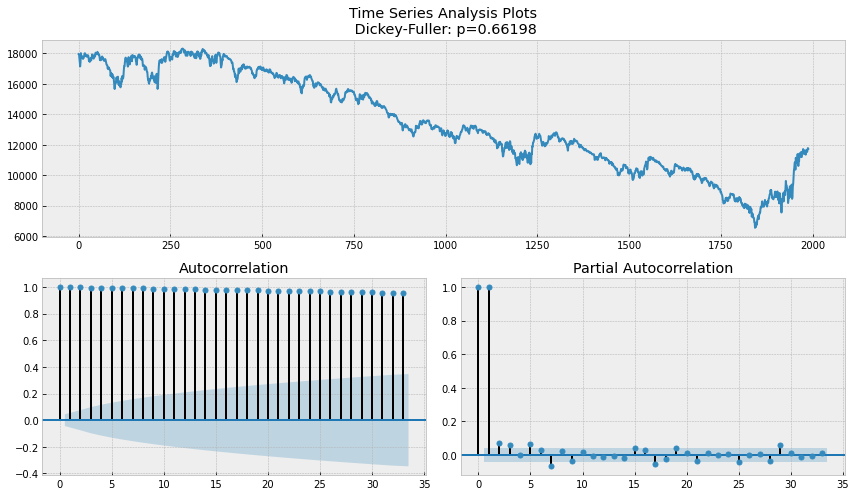

In [20]:
stationary_plot(df.Close)

So that's a very unstationary timeseries. Although we won't need it for our models it might still be interesting to try to make the data stationary. Challenge accepted.

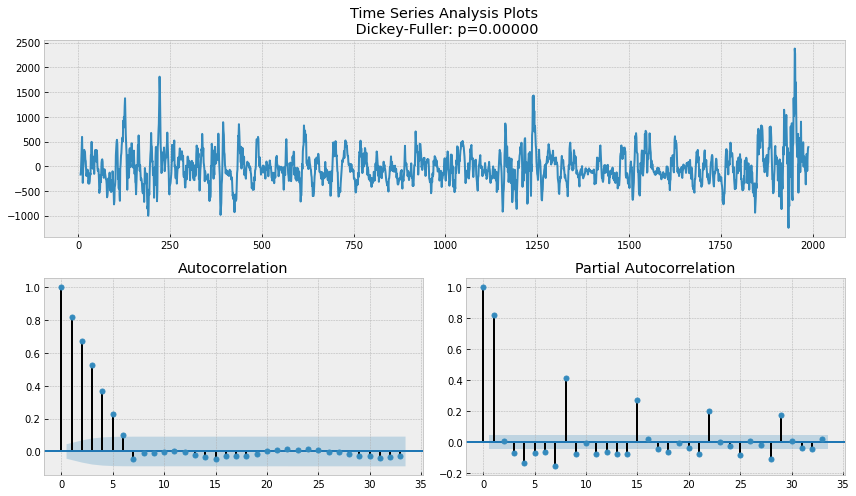

In [21]:
diff = df.Close - df.Close.shift(7)
stationary_plot(diff[7:])

It seems that removing weekly seasonality helped a bit but the autocorrelation plot still shows many significant lags.

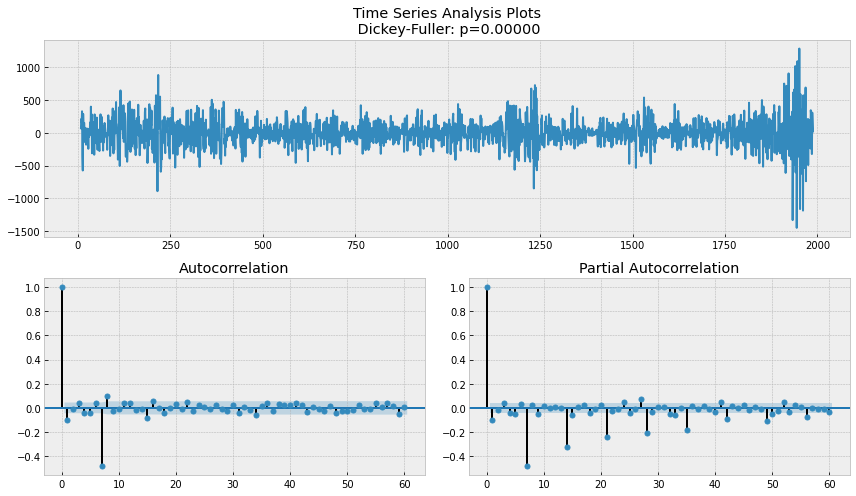

In [22]:
diff2 = diff - diff.shift(1)
stationary_plot(diff2[7+1:], lags=60)

Now this is a relatively stationary...well it's something oscilating around zero. From these plots the parameters for a SARIMA model can be inferred. However, this is for now beond the scope of this kernel.

Next we look at the compound sentiment scores.

In [23]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df.Date, y=df.compound_mean,
                    mode='lines',
                    name='Mean'))
fig2.add_trace(go.Scatter(x=df.Date, y=df.compound_max,
                    mode='lines',
                    name='Maximum'))
fig2.add_trace(go.Scatter(x=df.Date, y=df.compound_min,
                    mode='lines',
                    name='Minimum'))
title = []
title.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Development of sentiment compound score',
                               font=dict(family='Arial',
                                       size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig2.update_layout(xaxis_title='Date',
                   yaxis_title='Compound score',
                  annotations=title)
fig2.show()

Let's also plot the distribution of the compound score.

In [24]:
compm_hist = px.histogram(df, x="compound_mean")
compm_hist.show()

And the subjectivity scores

In [25]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df.Date, y=df.subjectivity_mean,
                    mode='lines',
                    name='Mean'))
fig3.add_trace(go.Scatter(x=df.Date, y=df.subjectivity_min,
                    mode='lines',
                    name='Min'))
fig3.add_trace(go.Scatter(x=df.Date, y=df.subjectivity_max,
                    mode='lines',
                    name='Max'))
title = []
title.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Development of subjectivity score',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig3.update_layout(xaxis_title='Date',
                   yaxis_title='Subjectivity score',
                  annotations=title)
fig3.show()

Now we plot distribution of the subjectivity scores as well.

In [26]:
subm_hist = px.histogram(df, x="subjectivity_mean")
subm_hist.show()

Next we'll look at some descriptive statistics about the data.

In [27]:
df.describe()

,Close,compound_mean,compound_max,compound_min,subjectivity_mean,subjectivity_max,subjectivity_min
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.0
mean,13463.032255,-0.213371,0.656226,-0.885679,0.251779,0.892645,0.0
std,3144.006996,0.106787,0.165626,0.062831,0.066196,0.144796,0.0
min,6547.049805,-0.546383,0.000000,-0.989800,0.080897,0.416667,0.0
25%,10913.379883,-0.283481,0.542300,-0.931600,0.205581,0.785714,0.0
50%,13025.580078,-0.210605,0.670500,-0.897900,0.249927,1.000000,0.0
75%,16478.410156,-0.141434,0.784500,-0.851900,0.297009,1.000000,0.0
max,18312.390625,0.166370,0.962300,-0.571900,0.470498,1.000000,0.0


# Feature selection
I'm not going to use many FS methods since the features were mostly handcrafted. So we'll simply look at their variance and proportion of unique values.

In [28]:
def unique_ratio (col):
    return len(np.unique(col))/len(col)

cols = ['Close', 'compound_mean', 'compound_max', 'compound_min', 'subjectivity_mean', 'subjectivity_max', 'subjectivity_min']

ur = []
var = []
for col in cols:
    ur.append(unique_ratio(df[col]))
    var.append(np.var(df[col]))
    
feature_sel = pd.DataFrame({'Column': cols, 
              'Unique': ur,
              'Variance': var})
feature_sel

,Column,Unique,Variance
0,Close,0.994470,9.879810e+06
1,compound_mean,1.000000,1.139781e-02
2,compound_max,0.188034,2.741819e-02
3,compound_min,0.176471,3.945775e-03
4,subjectivity_mean,0.999497,4.379750e-03
5,subjectivity_max,0.083962,2.095546e-02
6,subjectivity_min,0.000503,0.000000e+00


In [29]:
sel_fig = go.Figure(data=go.Scatter(
    x=feature_sel.Column,
    y=feature_sel.Unique,
    mode='markers',
    marker=dict(size=(feature_sel.Unique*100)),
))
sel_fig.update_layout(title='Ratio of unique values', 
                      yaxis_title='Unique ratio')
sel_fig.show()

Compound maximum and minimum are potentially less interesting as only ~18% of their values are unique. Also maximum of subjectivity has very low values. Minimum subjectivity has contains almost only 0. We'll drop the subjectivity min and max.

In [0]:
drop = ['subjectivity_min', 'subjectivity_max']
clean_df = df.drop(drop,axis=1)

# 5. Lag the extracted features
To allow the models to look into the past, we'll add features which are essentially just copies of rows from n-steps back. In order to not create too many new features we'll add only features from 1 week prior to the current datapoint.


In [31]:
lag_df = clean_df.copy()
lag_df.head(3)

,Date,Close,compound_mean,compound_max,compound_min,subjectivity_mean
0,2008-08-08,17949.369141,-0.350337,0.2144,-0.9260,0.163685
1,2008-08-11,17929.990234,-0.085277,0.8156,-0.8271,0.202921
2,2008-08-12,17694.679688,-0.318394,0.5423,-0.8591,0.374076


In [0]:
to_lag = list(lag_df.columns)
to_lag_4 = to_lag[1]
to_lag_1 = to_lag[2:len(to_lag)]

In [0]:
#lagging text features two days back
for col in to_lag_1:
    for i in range(1,3):
        new_name = col + ('_lag_{}'.format(i))
        lag_df[new_name] = lag_df[col].shift(i)
    
#lagging closing values 4 days back
for i in range(1, 5):
    new_name = to_lag_4 + ('_lag_{}'.format(i))
    lag_df[new_name] = lag_df[to_lag_4].shift(i)

In this process, rows with NAs were created. Unfortunately these rows will have to be removed since we simply don't have the data from the future.

In [34]:
#Show many rows need to be removed
lag_df.head(10) 

,Date,Close,compound_mean,compound_max,compound_min,subjectivity_mean,compound_mean_lag_1,compound_mean_lag_2,compound_max_lag_1,compound_max_lag_2,compound_min_lag_1,compound_min_lag_2,subjectivity_mean_lag_1,subjectivity_mean_lag_2,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4
0,2008-08-08,17949.369141,-0.350337,0.2144,-0.9260,0.163685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-08-11,17929.990234,-0.085277,0.8156,-0.8271,0.202921,-0.350337,NaN,0.2144,NaN,-0.9260,NaN,0.163685,NaN,17949.369141,NaN,NaN,NaN
2,2008-08-12,17694.679688,-0.318394,0.5423,-0.8591,0.374076,-0.085277,-0.350337,0.8156,0.2144,-0.8271,-0.9260,0.202921,0.163685,17929.990234,17949.369141,NaN,NaN
3,2008-08-13,17409.720703,-0.162032,0.5106,-0.8074,0.176371,-0.318394,-0.085277,0.5423,0.8156,-0.8591,-0.8271,0.374076,0.202921,17694.679688,17929.990234,17949.369141,NaN
4,2008-08-14,17140.240234,-0.194879,0.7177,-0.8689,0.319615,-0.162032,-0.318394,0.5106,0.5423,-0.8074,-0.8591,0.176371,0.374076,17409.720703,17694.679688,17929.990234,17949.369141
5,2008-08-15,17400.750000,-0.143104,0.4404,-0.7481,0.227282,-0.194879,-0.162032,0.7177,0.5106,-0.8689,-0.8074,0.319615,0.176371,17140.240234,17409.720703,17694.679688,17929.990234
6,2008-08-18,18011.070312,-0.263546,0.5106,-0.9260,0.216935,-0.143104,-0.194879,0.4404,0.7177,-0.7481,-0.8689,0.227282,0.319615,17400.750000,17140.240234,17409.720703,17694.679688
7,2008-08-19,17780.830078,-0.373172,0.5574,-0.8720,0.256786,-0.263546,-0.143104,0.5106,0.4404,-0.9260,-0.7481,0.216935,0.227282,18011.070312,17400.750000,17140.240234,17409.720703
8,2008-08-20,17829.730469,-0.197157,0.4847,-0.8807,0.095403,-0.373172,-0.263546,0.5574,0.5106,-0.8720,-0.9260,0.256786,0.216935,17780.830078,18011.070312,17400.750000,17140.240234
9,2008-08-21,17804.869141,-0.268522,0.5719,-0.9022,0.107994,-0.197157,-0.373172,0.4847,0.5574,-0.8807,-0.8720,0.095403,0.256786,17829.730469,17780.830078,18011.070312,17400.750000


Above we can see that the first 7 rows now have missing values. Let's delete them and reset index.

In [35]:
lag_df = lag_df.drop(lag_df.index[[np.arange(0,4)]])
lag_df = lag_df.reset_index(drop=True)

#sanity check for NaNs
lag_df.isnull().sum().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3940: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



0

In [36]:
lag_df.head(5)

,Date,Close,compound_mean,compound_max,compound_min,subjectivity_mean,compound_mean_lag_1,compound_mean_lag_2,compound_max_lag_1,compound_max_lag_2,compound_min_lag_1,compound_min_lag_2,subjectivity_mean_lag_1,subjectivity_mean_lag_2,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4
0,2008-08-14,17140.240234,-0.194879,0.7177,-0.8689,0.319615,-0.162032,-0.318394,0.5106,0.5423,-0.8074,-0.8591,0.176371,0.374076,17409.720703,17694.679688,17929.990234,17949.369141
1,2008-08-15,17400.750000,-0.143104,0.4404,-0.7481,0.227282,-0.194879,-0.162032,0.7177,0.5106,-0.8689,-0.8074,0.319615,0.176371,17140.240234,17409.720703,17694.679688,17929.990234
2,2008-08-18,18011.070312,-0.263546,0.5106,-0.9260,0.216935,-0.143104,-0.194879,0.4404,0.7177,-0.7481,-0.8689,0.227282,0.319615,17400.750000,17140.240234,17409.720703,17694.679688
3,2008-08-19,17780.830078,-0.373172,0.5574,-0.8720,0.256786,-0.263546,-0.143104,0.5106,0.4404,-0.9260,-0.7481,0.216935,0.227282,18011.070312,17400.750000,17140.240234,17409.720703
4,2008-08-20,17829.730469,-0.197157,0.4847,-0.8807,0.095403,-0.373172,-0.263546,0.5574,0.5106,-0.8720,-0.9260,0.256786,0.216935,17780.830078,18011.070312,17400.750000,17140.240234


# 8. Model training
Let's train 3 ML models. We'll do this in 2 rounds. First, using the econometric features alone (7 lags of y). Second, including the information extracted from the headlines (compound, subjectivity and their lags)

**Models**
- Ridge regression - punish model for using too many features but doesn't allow the coeficients drop to zero completely
- Random forest
- XGBoost

We'll score all models by mean squared error as it gives higher penalty to larger mistakes.
And before each model training we'll standardize the training data.


The first step will be creating folds for cross-validation. We'll use the same folds for all models in order to allow for creating a meta-model. Since we're working with timeseries the folds cannot be randomly selected. Instead a fold will be a sequence of data so that we don't lose the time information.

In [0]:
# for time-series cross-validation set 10 folds 
tscv = TimeSeriesSplit(n_splits=10)

The cost function to minimize is mean squared error because this function assigns cost proportionally to the error size. The mean absolute percentage error will be used for plotting and easier interpretation. It's much easier to understand the errors of a model in terms of percentage.
Each training set is scaled (normalized) independently to minimize data leakage.

In [0]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
scorer = make_scorer(mean_squared_error)
scaler = StandardScaler()   

Next we split the dataset into training and testing. 20% of the data will be used for testing.

In [0]:
def ts_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [40]:
X = lag_df.drop(['Close'],axis=1)
X.index = X["Date"]
X = X.drop(['Date'],axis=1)
y = lag_df.Close

X_train, X_test, y_train, y_test = ts_train_test_split(X, y, test_size = 0.2)

#sanity check
(len(X_train)+len(X_test))==len(X)

True

In [0]:
#function for plotting coeficients of models (lasso and XGBoost)
def plotCoef(model,train_x):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, train_x.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

# 8.1 Econometric models
First let's train models using only the lags of the y variable (i.e. Close).

In [0]:
econ_cols = list(X_train.columns)
econ_cols = econ_cols[12:17]
X_train_e = X_train[econ_cols]
X_test_e = X_test[econ_cols]
y_train_e = y_train
y_test_e = y_test

In [43]:
econ_perf = pd.DataFrame(columns=['Model','MSE', 'SD'])
econ_perf

,Model,MSE,SD


### Ridge regression

In [44]:
ridge_param = {'model__alpha': list(np.arange(0.001,1,0.001))}
ridge = Ridge(max_iter=5000)
pipe = Pipeline([
    ('scale', scaler),
    ('model', ridge)])
search_ridge = GridSearchCV(estimator=pipe,
                          param_grid = ridge_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4
                         )
search_ridge.fit(X_train_e, y_train_e)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=5000,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_j...
                                          0.010000000000000002, 0.011, 0.012,
                                 

In [45]:
ridge_e = search_ridge.best_estimator_

#get cv results of the best model + confidence intervals
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(ridge_e, X_train_e, y_train_e, cv=tscv, scoring=scorer)
econ_perf = econ_perf.append({'Model':'Ridge', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
ridge_e

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Ridge(alpha=0.999, copy_X=True, fit_intercept=True,
                       max_iter=5000, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

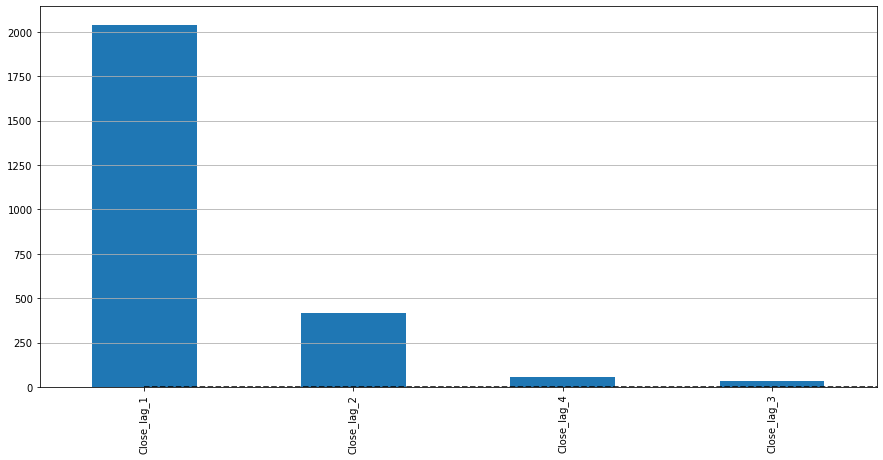

In [46]:
plotCoef(ridge_e['model'], X_train_e)

In [47]:
coefs = ridge_e['model'].coef_
ridge_coefs = pd.DataFrame({'Coef': coefs,
                           'Name': list(X_train_e.columns)})
ridge_coefs["abs"] = ridge_coefs.Coef.apply(np.abs)
ridge_coefs = ridge_coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
ridge_coefs

,Coef,Name
0,2041.601673,Close_lag_1
1,414.480793,Close_lag_2
3,58.219956,Close_lag_4
2,30.646149,Close_lag_3


In [48]:
econ_perf

,Model,MSE,SD
0,Ridge,16148.54356,8475.253033


## Random forest

In [0]:
rf_param = {'model__n_estimators': [10, 100, 300],
            'model__max_depth': [10, 20, 30, 40],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 3],
            'model__max_features': ["auto", 'sqrt']}

In [0]:
rf = RandomForestRegressor()
pipe = Pipeline([
    ('scale', scaler),
    ('model', rf)])
gridsearch_rf = GridSearchCV(estimator=pipe,
                          param_grid = rf_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )

In [51]:
gridsearch_rf.fit(X_train_e, y_train_e)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    8.5s
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:   36.9s
[Parallel(n_jobs=4)]: Done 296 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 520 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 808 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 1160 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 2056 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  9.5min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples

### XGBoost
Using linear booster because tree methods don't work with timeseries very well

In [0]:
xgb_param = {'model__lambda': list(np.arange(0.1,3, 0.1)), #L2 regularisation
             'model__alpha': list(np.arange(0.1,3, 0.1)),  #L1 regularisation
            }

In [0]:
xgb = XGBRegressor(booster='gblinear', feature_selector='shuffle', objective='reg:squarederror')

pipe = Pipeline([
    ('scale', scaler),
    ('model', xgb)])
gridsearch_xgb = GridSearchCV(estimator=pipe,
                          param_grid = xgb_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )

In [54]:
gridsearch_xgb.fit(X_train_e, y_train_e)

Fitting 10 folds for each of 841 candidates, totalling 8410 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 356 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 996 tasks      | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done 1892 tasks      | elapsed:   38.9s
[Parallel(n_jobs=4)]: Done 3044 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 4452 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 6116 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 8036 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 8403 out of 8410 | elapsed:  2.7min remaining:    0.1s
[Parallel(n_jobs=4)]: Done 8410 out of 8410 | elapsed:  2.7min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gblinear',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     feature_selector='shuffle',
                                                     gamma=0,
                                              

In [55]:
xgb_e = gridsearch_xgb.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(xgb_e, X_train_e, y_train_e, cv=tscv, scoring=scorer)
econ_perf = econ_perf.append({'Model':'XGB', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
xgb_e

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBRegressor(alpha=0.1, base_score=0.5, booster='gblinear',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, feature_selector='shuffle',
                              gamma=0, importance_type='gain', lambda=0.1,
                              learning_rate=0.1, max_delta_step=0, max_depth=3,
                              min_child_weight=1, missing=None,
                              n_estimators=100, n_jobs=1, nthread=None,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              seed=None, silent=None, subsample=1,
                              verbosity=1))],
         verbose=False)

In [56]:
print(econ_perf)

   Model            MSE             SD
0  Ridge   16148.543560    8475.253033
1    XGB  355500.584378  255903.740413


Plot performance of econ models including error bars

In [57]:
econ_fig = px.scatter(econ_perf, x="Model", y='MSE', color='Model', error_y="SD")
econ_fig.update_layout(title_text="Performance of models trained on lags of y")
econ_fig.show()

## NLP models
Let's try now predict the stock value using only information from the news headlines.

In [0]:
X_train_n = X_train.drop(econ_cols, axis=1)
X_test_n = X_test.drop(econ_cols, axis=1)
y_train_n = y_train
y_test_n = y_test

In [59]:
nlp_perf = pd.DataFrame(columns=['Model','MSE', 'SD'])
nlp_perf

,Model,MSE,SD


## Ridge regression

In [60]:
ridge_param = {'model__alpha': list(np.arange(1,10,0.1))}
ridge = Ridge(max_iter=5000)
pipe = Pipeline([
    ('scale', scaler),
    ('model', ridge)
])
search_ridge = GridSearchCV(estimator=pipe,
                          param_grid = ridge_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4
                         )
search_ridge.fit(X_train_n, y_train_n)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=5000,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_j...
                                          2.7000000000000015,
                                          2.80000

In [61]:
ridge_n = search_ridge.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(ridge_n, X_train_n, y_train_n, cv=tscv, scoring=scorer)
nlp_perf = nlp_perf.append({'Model':'Ridge', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
ridge_n

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=5000, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

,Coef,Name
9,176.475836,compound_min_lag_2
8,174.491579,compound_min_lag_1
4,-161.967168,compound_mean_lag_1
2,155.113418,compound_min
0,-148.861923,compound_mean
5,-142.729498,compound_mean_lag_2
11,124.893794,subjectivity_mean_lag_2
3,120.614286,subjectivity_mean
10,119.342369,subjectivity_mean_lag_1
1,-38.547425,compound_max


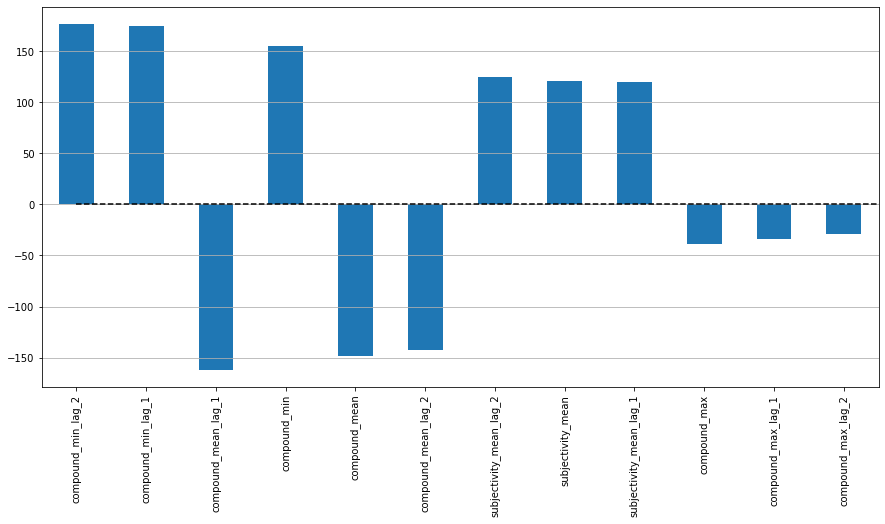

In [62]:
plotCoef(ridge_n['model'], X_train_n)

coefs = ridge_n['model'].coef_
ridge_coefs = pd.DataFrame({'Coef': coefs,
                           'Name': list(X_train_n.columns)})
ridge_coefs["abs"] = ridge_coefs.Coef.apply(np.abs)
ridge_coefs = ridge_coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
ridge_coefs

In [63]:
mape(y_test, ridge_n.predict(X_test_n))

58.834688383140566

## Random Forest

In [64]:
rf_param = {'model__n_estimators': [10, 100, 300],
            'model__max_depth': [10, 20, 30, 40],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 3],
            'model__max_features': ["auto", 'sqrt']}
rf = RandomForestRegressor()
pipe = Pipeline([
    ('scale', scaler),
    ('model', rf)])
gridsearch_rf = GridSearchCV(estimator=pipe,
                          param_grid = rf_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )
gridsearch_rf.fit(X_train_n, y_train_n)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 292 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 516 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 804 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 1156 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 1572 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done 2052 tasks      | elapsed: 15.3min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed: 15.8min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples

In [0]:
rf_n = gridsearch_rf.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(rf_n, X_train_n, y_train_n, cv=tscv, scoring=scorer)
nlp_perf = nlp_perf.append({'Model':'RF', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)

## XGBoost

In [66]:
xgb_param = {'model__lambda': list(np.arange(1,10, 1)), #L2 regularisation
             'model__alpha': list(np.arange(1,10, 1)),  #L1 regularisation
            }
xgb = XGBRegressor(booster='gblinear', feature_selector='shuffle', objective='reg:squarederror')

pipe = Pipeline([
    ('scale', scaler),
    ('model', xgb)])
gridsearch_xgb = GridSearchCV(estimator=pipe,
                          param_grid = xgb_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )
gridsearch_xgb.fit(X_train_n, y_train_n)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 168 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 488 tasks      | elapsed:   15.5s
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:   23.8s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gblinear',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     feature_selector='shuffle',
                                                     gamma=0,
                                              

In [67]:
xgb_n = gridsearch_xgb.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(xgb_n, X_train_n, y_train_n, cv=tscv, scoring=scorer)
nlp_perf = nlp_perf.append({'Model':'XGB', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
xgb_n

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBRegressor(alpha=1, base_score=0.5, booster='gblinear',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, feature_selector='shuffle',
                              gamma=0, importance_type='gain', lambda=1,
                              learning_rate=0.1, max_delta_step=0, max_depth=3,
                              min_child_weight=1, missing=None,
                              n_estimators=100, n_jobs=1, nthread=None,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              seed=None, silent=None, subsample=1,
                              verbosity=1))],
         verbose=False)

In [68]:
print(nlp_perf)

   Model           MSE            SD
0  Ridge  8.061417e+06  6.728504e+06
1     RF  8.119491e+06  6.948268e+06
2    XGB  8.046311e+06  6.695244e+06


In [69]:
nlp_fig = px.scatter(nlp_perf, x="Model", y='MSE', color='Model', error_y="SD")
#nlp_fig.update_layout(title_text="Performance of models trained on NLP features",
nlp_fig.show()

The 3 models are performing quite similary. They might be useful candidates for stacking.

# Econ+NLP models
Let's use all features now

## Ridge regression

In [70]:
en_perf = pd.DataFrame(columns=['Model','MSE', 'SD'])
en_perf

,Model,MSE,SD


In [0]:
ridge_param = {'model__alpha': list(np.arange(0.1,1,0.01))}
ridge = Ridge(max_iter=5000)
pipe = Pipeline([
    ('scale', scaler),
    ('model', ridge)])
search_ridge = GridSearchCV(estimator=pipe,
                          param_grid = ridge_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )
search_ridge.fit(X_train, y_train)

In [71]:
ridge_en = search_ridge.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(ridge_en, X_train, y_train, cv=tscv, scoring=scorer)
en_perf = en_perf.append({'Model':'Ridge', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
ridge_en

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=5000, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [72]:
coefs = ridge_en['model'].coef_
ridge_coefs = pd.DataFrame({'Coef': coefs,
                           'Name': list(X_train.columns)})
ridge_coefs["abs"] = ridge_coefs.Coef.apply(np.abs)
ridge_coefs = ridge_coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
ridge_coefs

ValueError: ignored

In [0]:
plotCoef(ridge_en['model'], X_train)

## Random Forest

In [0]:
rf_param = {'model__n_estimators': [10, 100, 300],
            'model__max_depth': [10, 20, 30, 40],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 3],
            'model__max_features': ["auto", 'sqrt']}
rf = RandomForestRegressor()
pipe = Pipeline([
    ('scale', scaler),
    ('model', rf)])
gridsearch_rf = GridSearchCV(estimator=pipe,
                          param_grid = rf_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )
gridsearch_rf.fit(X_train, y_train)

In [0]:
rf_en = gridsearch_rf.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(rf_en, X_train, y_train, cv=tscv, scoring=scorer)
en_perf = en_perf.append({'Model':'RF', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
rf_en

## XGBoost

In [0]:
xgb_param = {'model__lambda': list(np.arange(1,10, 1)), #L2 regularisation
             'model__alpha': list(np.arange(1,10, 1)),  #L1 regularisation
            }
xgb = XGBRegressor(booster='gblinear', feature_selector='shuffle', objective='reg:squarederror')

pipe = Pipeline([
    ('scale', scaler),
    ('model', xgb)])
gridsearch_xgb = GridSearchCV(estimator=pipe,
                          param_grid = xgb_param,
                          scoring = scorer,
                          cv = tscv,
                          n_jobs=4,
                          verbose=3
                         )
gridsearch_xgb.fit(X_train, y_train)

In [0]:
xgb_en = gridsearch_xgb.best_estimator_

#get cv results of the best model + confidence intervals
cv_score = cross_val_score(xgb_en, X_train, y_train, cv=tscv, scoring=scorer)
en_perf = en_perf.append({'Model':'XGB', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}, ignore_index=True)
xgb_en

# Try stacking econometric and NLP models

In [0]:
from sklearn.model_selection import cross_val_predict

X_train_stack = pd.DataFrame(pd.DataFrame(columns=['econ_r', 'nlp_r']))
X_train_stack['econ_r'] = cross_val_predict(ridge_e, X_train_e, y_train, cv=10)
X_train_stack['nlp_r'] = cross_val_predict(ridge_n, X_train_n, y_train, cv=10)

X_test_stack = pd.DataFrame(pd.DataFrame(columns=['econ_r', 'nlp_r']))
X_test_stack['econ_r'] = ridge_e.predict(X_test_e)
X_test_stack['nlp_r'] = ridge_n.predict(X_test_n)

X_train_stack.to_csv("Stack_train.csv")
X_test_stack.to_csv("Stack_test.csv")

from sklearn.linear_model import ElasticNetCV
stack = ElasticNetCV(cv=tscv)
stack.fit(X_train_stack, y_train)
cv_score = cross_val_score(stack, X_train_stack, y_train, cv=tscv, scoring=scorer)
stack_performance = {'Model':'XGB', 'MSE':np.mean(cv_score), 'SD':(np.std(cv_score))}
stack_performance

mape(y_test, stack.predict(X_test_stack))

In [0]:
coefs = stack.coef_
ridge_coefs = pd.DataFrame({'Coef': coefs,
                           'Name': list(X_train_stack.columns)})
ridge_coefs["abs"] = ridge_coefs.Coef.apply(np.abs)
ridge_coefs = ridge_coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
print(ridge_coefs)
plotCoef(stack, X_train_stack)

# Model comparison

In [0]:
prediction_compare = pd.DataFrame(pd.DataFrame(columns=['y_true', 'econ_r', 'econ_rf', 'econ_x', 'nlp_r', 'nlp_rf', 'nlp_x', 'comb_r', 'comb_rf', 'comb_x', 'stack']))
prediction_compare['y_true'] = y_test
prediction_compare['econ_r'] = ridge_e.predict(X_test_e)
prediction_compare['econ_rf'] = rf_e.predict(X_test_e)
prediction_compare['econ_x'] = xgb_e.predict(X_test_e)
prediction_compare['nlp_r'] = ridge_n.predict(X_test_n)
prediction_compare['nlp_rf'] = rf_n.predict(X_test_n)
prediction_compare['nlp_x'] = xgb_n.predict(X_test_n)
prediction_compare['comb_r'] = ridge_en.predict(X_test)
prediction_compare['comb_rf'] = rf_en.predict(X_test)
prediction_compare['comb_x'] = xgb_en.predict(X_test)
prediction_compare['stack'] = stack.predict(X_test_stack)

prediction_compare.sample(3)

In [0]:
econ_perf.to_csv("econ_perf.csv")
nlp_perf.to_csv("nlp_perf.csv")
en_perf.to_csv("en_perf.csv")
prediction_compare.to_csv('compare_predictions.csv')
X_test.to_csv('X_test.csv')

# Stacking classification and regression
Using NLP features in the above models turned out to by highly ineffective. There are, however some problems of the econometric models that NLP features might be able to solve. From other kernels you can see that they can be used for predicting whether the stock value will go up or down. In following section, we'll train direction classifier with NLP features and use the output of this model to improve the econometric models.